# Final Project

https://www.kaggle.com/datasets/shuyangli94/food-com-recipes-and-user-interactions?select=RAW_recipes.csv

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import networkx as nx
from itertools import combinations
from networkx.algorithms import bipartite

In [48]:
recipes_df = pd.read_csv('RAW_recipes.csv')

In [50]:
recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


In [51]:
## ingredeints are a string not a list
## use ast package to change

recipes_df['ingredients'] = recipes_df['ingredients'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.strip() else [])

In [52]:
users_df = pd.read_csv('RAW_interactions.csv')
users_df.head()

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


## Ignore Duplicates

In [53]:
recipes_df = recipes_df.drop_duplicates(subset=['id'])
users_df = users_df.drop_duplicates(subset=['user_id', 'recipe_id'])

In [55]:
recipes_exploded = recipes_df[['name', 'id', 'ingredients']].explode('ingredients')
recipes_exploded

,name,id,ingredients
0,arriba baked winter squash mexican style,137739,winter squash
0,arriba baked winter squash mexican style,137739,mexican seasoning
0,arriba baked winter squash mexican style,137739,mixed spice
0,arriba baked winter squash mexican style,137739,honey
0,arriba baked winter squash mexican style,137739,butter
...,...,...,...
231636,cookies by design sugar shortbread cookies,298509,eggs
231636,cookies by design sugar shortbread cookies,298509,flour
231636,cookies by design sugar shortbread cookies,298509,cream of tartar
231636,cookies by design sugar shortbread cookies,298509,baking soda


In [56]:
recipes_network = pd.merge(recipes_exploded, users_df, left_on='id', right_on='recipe_id', how='left')
recipes_network

,name,id,ingredients,user_id,recipe_id,date,rating,review
0,arriba baked winter squash mexican style,137739,winter squash,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
1,arriba baked winter squash mexican style,137739,winter squash,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...
2,arriba baked winter squash mexican style,137739,winter squash,178427,137739,2011-12-05,5,Excellent recipe! I used butternut squash and ...
3,arriba baked winter squash mexican style,137739,mexican seasoning,4470,137739,2006-02-18,5,I used an acorn squash and recipe#137681 Swee...
4,arriba baked winter squash mexican style,137739,mexican seasoning,593927,137739,2010-08-21,5,This was a nice change. I used butternut squas...
...,...,...,...,...,...,...,...,...
10136976,cookies by design sugar shortbread cookies,298509,baking soda,1546277,298509,2010-02-08,5,"yummy cookies, i love this recipe me and my sm..."
10136977,cookies by design sugar shortbread cookies,298509,baking soda,1803287907,298509,2014-11-01,0,I work at a Cookies By Design and can say this...
10136978,cookies by design sugar shortbread cookies,298509,vanilla extract,866651,298509,2008-06-19,1,This recipe tastes nothing like the Cookies by...
10136979,cookies by design sugar shortbread cookies,298509,vanilla extract,1546277,298509,2010-02-08,5,"yummy cookies, i love this recipe me and my sm..."


## Exploratory Data Analysis

In [60]:
recipes_network['id'].nunique()

231637

In [59]:
recipes_network['ingredients'].nunique()

14942

In [58]:
recipes_network['user_id'].nunique()

226570

### Number of Times Ingredient Was Used

In [12]:
recipes_network.groupby(['ingredients'])['recipe_id'].nunique().reset_index().sort_values(by='recipe_id', ascending=False).rename(columns={'recipe_id':'total_recipes'}).head(10)

,ingredients,total_recipes
11751,salt,85746
1651,butter,54975
12908,sugar,44535
9414,onion,39065
14316,water,34914
4453,eggs,33761
9397,olive oil,32822
4941,flour,26266
8727,milk,25786
5692,garlic cloves,25748


## Network Centrality Measures

In [79]:
recipes_network[['ingredients', 'recipe_id']]

,ingredients,recipe_id
0,winter squash,137739
1,winter squash,137739
2,winter squash,137739
3,mexican seasoning,137739
4,mexican seasoning,137739
...,...,...
10136976,baking soda,298509
10136977,baking soda,298509
10136978,vanilla extract,298509
10136979,vanilla extract,298509


In [80]:
# Group by recipe_id to get lists of ingredients per recipe
grouped = recipes_network.groupby('recipe_id')['ingredients'].apply(set).reset_index().sample(1000, random_state=123)


In [81]:
# Create an undirected graph
G = nx.Graph()

# Add edges for each pair of ingredients in the same recipe
for ingredients in grouped['ingredients']:
    for ingredient1, ingredient2 in combinations(ingredients, 2):
        if G.has_edge(ingredient1, ingredient2):
            G[ingredient1][ingredient2]['weight'] += 1
        else:
            G.add_edge(ingredient1, ingredient2, weight=1)

### Degree Centrality

In [82]:
# Compute degree centrality (normalized between 0 and 1)
degree_centrality = nx.degree_centrality(G)

degree_df = pd.DataFrame(degree_centrality.items(), columns=['ingredient', 'degree_centrality'])
degree_df = degree_df.sort_values(by='degree_centrality', ascending=False)
degree_df.head(10)

,ingredient,degree_centrality
5,salt,0.525510
18,onion,0.350510
45,butter,0.331633
17,water,0.321939
83,olive oil,0.306633
26,sugar,0.301531
29,garlic cloves,0.275510
1,eggs,0.253571
31,pepper,0.220918
25,garlic,0.207143


### Eigenvector Centrality

In [83]:
# Compute Eigenvector centrality (normalized between 0 and 1)
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000, tol=1e-06)

eigen_df = pd.DataFrame(eigenvector_centrality.items(), columns=['ingredient', 'eigenvector_centrality'])
eigen_df = eigen_df.sort_values(by='eigenvector_centrality', ascending=False)

eigen_df.head(10)

,ingredient,eigenvector_centrality
5,salt,0.199733
18,onion,0.161850
45,butter,0.151052
17,water,0.150989
83,olive oil,0.149960
29,garlic cloves,0.139321
26,sugar,0.137810
1,eggs,0.125146
31,pepper,0.124234
25,garlic,0.117444


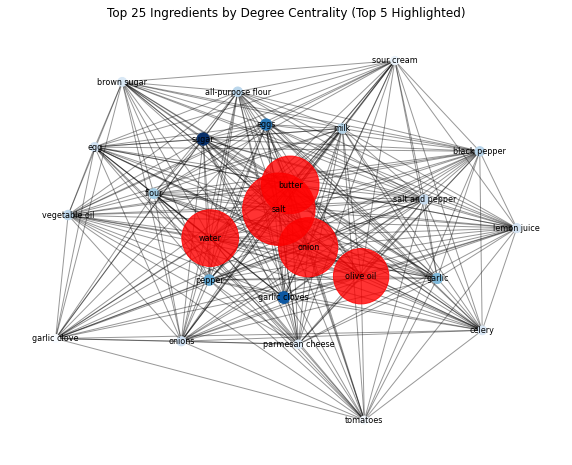

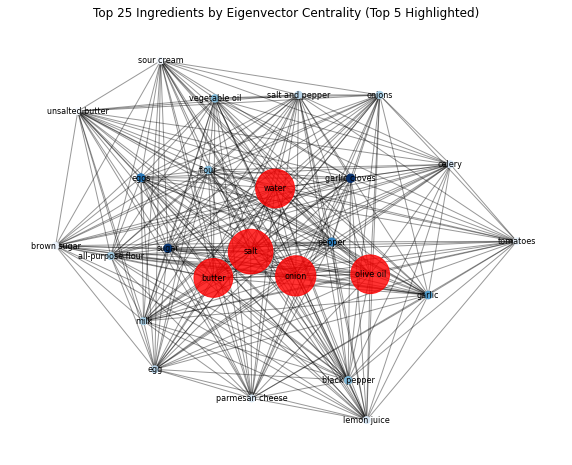

In [84]:
G_subgraph = G.subgraph(max(nx.connected_components(G), key=len)).copy()

# Use raw centrality values directly
degree_centrality_values = degree_centrality
eigenvector_centrality_values = eigenvector_centrality

# Get top 25 nodes by degree centrality
nodes_top25_degree = sorted(degree_centrality_values, key=degree_centrality_values.get, reverse=True)[:25]
nodes_top5_degree = nodes_top25_degree[:5]

# Get top 25 nodes by eigenvector centrality
nodes_top25_eigen = sorted(eigenvector_centrality_values, key=eigenvector_centrality_values.get, reverse=True)[:25]
nodes_top5_eigen = nodes_top25_eigen[:5]

# Create subgraphs for top 25 ingredients
G_degree_25 = G_subgraph.subgraph(nodes_top25_degree).copy()
G_eigen_25 = G_subgraph.subgraph(nodes_top25_eigen).copy()

# Layouts
pos_degree_25 = nx.spring_layout(G_degree_25, seed=123, k=0.1)
pos_eigen_25 = nx.spring_layout(G_eigen_25, seed=123, k=0.1)

# Plot Degree Centrality
plt.figure(figsize=(10, 8))
non_top5_nodes_degree = [n for n in G_degree_25.nodes() if n not in nodes_top5_degree]
nx.draw_networkx_nodes(G_degree_25, pos_degree_25,
                       nodelist=non_top5_nodes_degree,
                       node_size=[degree_centrality_values[n]*500 for n in non_top5_nodes_degree],
                       node_color=[degree_centrality_values[n] for n in non_top5_nodes_degree],
                       cmap=plt.cm.Blues)
nx.draw_networkx_nodes(G_degree_25, pos_degree_25,
                       nodelist=nodes_top5_degree,
                       node_size=[degree_centrality_values[n]*10000 for n in nodes_top5_degree],
                       node_color='red', alpha=0.8)
nx.draw_networkx_edges(G_degree_25, pos_degree_25, alpha=0.4)
nx.draw_networkx_labels(G_degree_25, pos_degree_25, font_size=8)
plt.title("Top 25 Ingredients by Degree Centrality (Top 5 Highlighted)")
plt.axis('off')
plt.show()

# Plot Eigenvector Centrality
plt.figure(figsize=(10, 8))
non_top5_nodes_eigen = [n for n in G_eigen_25.nodes() if n not in nodes_top5_eigen]
nx.draw_networkx_nodes(G_eigen_25, pos_eigen_25,
                       nodelist=non_top5_nodes_eigen,
                       node_size=[eigenvector_centrality_values[n]*500 for n in non_top5_nodes_eigen],
                       node_color=[eigenvector_centrality_values[n] for n in non_top5_nodes_eigen],
                       cmap=plt.cm.Blues)
nx.draw_networkx_nodes(G_eigen_25, pos_eigen_25,
                       nodelist=nodes_top5_eigen,
                       node_size=[eigenvector_centrality_values[n]*10000 for n in nodes_top5_eigen],
                       node_color='red', alpha=0.8)
nx.draw_networkx_edges(G_eigen_25, pos_eigen_25, alpha=0.4)
nx.draw_networkx_labels(G_eigen_25, pos_eigen_25, font_size=8)
plt.title("Top 25 Ingredients by Eigenvector Centrality (Top 5 Highlighted)")
plt.axis('off')
plt.show()

## Unweighted and Weighted Network

In [85]:
top_25_degree = degree_df.reset_index(drop=True)['ingredient'][:25]
top_25_eigen = eigen_df.reset_index(drop=True)['ingredient'][:25]

In [86]:
top_25_combined = pd.concat([top_25_degree, top_25_eigen]).unique()
len(top_25_combined)

26

In [87]:
bipartite_data = recipes_network[['ingredients', 'recipe_id']]
bipartite_data_filtered = bipartite_data[bipartite_data['ingredients'].isin(top_25_combined)]

In [88]:
bipartite_data_filtered

,ingredients,recipe_id
12,butter,137739
13,butter,137739
14,butter,137739
15,olive oil,137739
16,olive oil,137739
...,...,...
10136967,eggs,298509
10136968,eggs,298509
10136969,flour,298509
10136970,flour,298509


In [109]:
unique_recipe_ids = bipartite_data_filtered['recipe_id'].unique()
unique_recipe_series = pd.Series(unique_recipe_ids)
sample_recipe_ids = unique_recipe_series.sample(n=1000, random_state=123)

bipartite_data_sample = recipes_network[recipes_network['recipe_id'].isin(sample_recipe_ids)]

In [110]:
len(bipartite_data_sample['ingredients'].unique())

1844

In [118]:
R = nx.Graph()

R.add_nodes_from(bipartite_data_sample["ingredients"], bipartite=0)  
R.add_nodes_from(bipartite_data_sample["recipe_id"], bipartite=1)   
R.add_edges_from(zip(bipartite_data_sample["ingredients"], bipartite_data_sample["recipe_id"]))  

recipe_nodes = bipartite_data_sample["recipe_id"].unique()
projected_graph = nx.bipartite.projected_graph(R, recipe_nodes)

recipe_degree_df = pd.DataFrame(list(projected_graph.degree()), columns=['Recipe', 'Users']).sort_values(by='Users', ascending=False)
recipe_degree_df.head(10)

,Recipe,Users
592,425234,849
46,69861,832
421,148359,825
430,401815,812
189,233436,788
8,313066,783
982,378407,779
206,117056,778
253,108693,778
57,41948,778


In [119]:
weighted_projected_graph = bipartite.weighted_projected_graph(R, recipe_nodes)
recipe_weight_df = pd.DataFrame(list(weighted_projected_graph.degree(weight='weight')), columns=['Recipe', 'Users']).sort_values(by='Users', ascending=False)
recipe_weight_df.head(10)

,Recipe,Users
592,425234,1748
46,69861,1691
430,401815,1618
253,108693,1532
421,148359,1527
711,146034,1522
710,267189,1496
8,313066,1489
936,223857,1483
189,233436,1475


In [120]:
recipe_degree_df

,Recipe,Users
592,425234,849
46,69861,832
421,148359,825
430,401815,812
189,233436,788
...,...,...
17,146541,71
665,31510,71
410,428317,70
329,89874,65


## Text NLP Stuff

In [121]:
import pandas as pd
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk

stop_words = set(stopwords.words('english'))

recipe_description = recipes_df[['id', 'description']].sample(10000, random_state=123)

recipe_description = recipe_description.rename(columns={'id': 'recipe_id'})


# Function to get normalized word frequency per row excluding stopwords
def normalized_word_freq(text):
    if not isinstance(text, str):
        return {}
    words = re.findall(r'\b\w+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    total = len(filtered_words)
    counts = Counter(filtered_words)
    return {word: count / total for word, count in counts.items()} if total > 0 else {}

# Apply function
recipe_description['word_freq'] = recipe_description['description'].apply(normalized_word_freq)

# Reset index before expansion
recipe_description_reset = recipe_description.reset_index(drop=True)

# Expand dictionary to DataFrame
word_freq_df = pd.DataFrame(recipe_description_reset['word_freq'].to_list()).fillna(0)

# Combine with recipe ID
result_df = pd.concat([recipe_description_reset[['recipe_id']], word_freq_df], axis=1)

result_df


,recipe_id,favorite,mine,great,low,carb,easy,make,cheesy,cauliflower,...,appleton,pewaukee,derives,beggar,purses,beauties,sparkled,mugs,hesitated,agua
0,318526,0.1,0.1,0.100,0.100000,0.1,0.100000,0.100000,0.1,0.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7399,0.0,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,161266,0.0,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,233665,0.0,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,306936,0.0,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,41953,0.0,0.0,0.000,0.000000,0.0,0.076923,0.076923,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9996,95938,0.0,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9997,191851,0.0,0.0,0.000,0.058824,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9998,113667,0.0,0.0,0.050,0.000000,0.0,0.050000,0.050000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
# Merge the two DataFrames on recipe_id (id in result_df)
merged_df = result_df.merge(users_df, left_on='recipe_id', right_on='recipe_id')

# If the column is named 'rating_y', rename it to 'rating'
merged_df.rename(columns={'rating_y': 'rating'}, inplace=True)

# Classify ratings: 0-2 = 'bad', 3-5 = 'good'
merged_df['review_quality'] = merged_df['rating'].apply(lambda x: 'good_rating' if x >= 3 else 'bad_rating')

# Count good and bad reviews per recipe
sentiment_counts = merged_df.groupby('recipe_id')['review_quality'].value_counts().unstack(fill_value=0)

# Compute average rating per recipe
average_ratings = merged_df.groupby('recipe_id')['rating'].mean().rename('average_rating')

# Combine into one summary DataFrame
summary_df = sentiment_counts.join(average_ratings)

# Determine overall sentiment
summary_df['overall_sentiment'] = summary_df.apply(
    lambda row: 'positive' if row.get('good_rating', 0) > row.get('bad_rating', 0) else 'negative',
    axis=1
)

summary_df = summary_df.reset_index()


In [139]:
summary_df

,recipe_id,bad_rating,good_rating,average_rating,overall_sentiment
0,100,0,2,3.00,positive
1,114,0,4,5.00,positive
2,118,0,2,4.00,positive
3,128,0,2,5.00,positive
4,133,0,4,4.75,positive
...,...,...,...,...,...
9995,535779,5,5,2.00,negative
9996,536212,0,1,5.00,positive
9997,536383,0,1,5.00,positive
9998,536446,0,1,5.00,positive


In [141]:
# Step 1: Merge summary_df with result_df
merged_final_df = result_df.merge(summary_df, on='recipe_id', how='left')

# Step 2: Encode 'overall_sentiment' as numeric (1 for good, 0 for bad)
merged_final_df['overall_sentiment_numeric'] = merged_final_df['overall_sentiment'].map({'positive': 1, 'negative': 0})

In [142]:
merged_final_df

,recipe_id,favorite,mine,great,low,carb,easy,make,cheesy,cauliflower,...,beauties,sparkled,mugs,hesitated,agua,bad_rating,good_rating,average_rating,overall_sentiment,overall_sentiment_numeric
0,318526,0.1,0.1,0.100,0.100000,0.1,0.100000,0.100000,0.1,0.1,...,0.0,0.0,0.0,0.0,0.0,2,7,3.888889,positive,1
1,7399,0.0,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,3.000000,positive,1
2,161266,0.0,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,3,5.000000,positive,1
3,233665,0.0,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1,0,1.000000,negative,0
4,306936,0.0,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,1,4.000000,positive,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,41953,0.0,0.0,0.000,0.000000,0.0,0.076923,0.076923,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,4,4.500000,positive,1
9996,95938,0.0,0.0,0.000,0.000000,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,2,5.000000,positive,1
9997,191851,0.0,0.0,0.000,0.058824,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,2,3.500000,positive,1
9998,113667,0.0,0.0,0.050,0.000000,0.0,0.050000,0.050000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0,3,5.000000,positive,1


In [143]:
# Drop non-feature columns (optional: drop recipe_id and text-based sentiment)
X = merged_final_df.drop(columns=["recipe_id", "overall_sentiment", "overall_sentiment_numeric", 
                     "bad_rating", "good_rating", "average_rating"])
y = merged_final_df["overall_sentiment_numeric"]

In [ ]:
# Convert numeric features to a dict with binary flags (or discretized buckets)
def to_nltk_features(row):
    return {col: (val > 0) for col, val in row.items()}

nltk_features = X.apply(to_nltk_features, axis=1)
nltk_dataset = list(zip(nltk_features, y))

In [38]:
import nltk
from nltk.classify import NaiveBayesClassifier
from nltk.classify.util import accuracy

train_data = nltk_dataset[:int(0.8 * len(nltk_dataset))]
test_data = nltk_dataset[int(0.8 * len(nltk_dataset)):]

classifier = NaiveBayesClassifier.train(train_data)
print("Accuracy:", accuracy(classifier, test_data))


Accuracy: 0.934


In [43]:
classifier.show_most_informative_features(20)

Most Informative Features
                    17th = True                0 : 1      =     46.5 : 1.0
              historical = True                0 : 1      =     46.5 : 1.0
                 testing = True                0 : 1      =     46.5 : 1.0
                thursday = True                0 : 1      =     46.5 : 1.0
                    16th = True                0 : 1      =     27.9 : 1.0
                     170 = True                0 : 1      =     27.9 : 1.0
                    1968 = True                0 : 1      =     27.9 : 1.0
                     1lb = True                0 : 1      =     27.9 : 1.0
                     3rd = True                0 : 1      =     27.9 : 1.0
             accommodate = True                0 : 1      =     27.9 : 1.0
                  agents = True                0 : 1      =     27.9 : 1.0
                    airy = True                0 : 1      =     27.9 : 1.0
               asheville = True                0 : 1      =     27.9 : 1.0

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr.predict(X_test_scaled)))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)  # Random forest doesn't need scaling
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))


Logistic Regression Accuracy: 0.942
Random Forest Accuracy: 0.964


In [46]:
from sklearn.metrics import classification_report

# Logistic Regression
lr_preds = lr.predict(X_test_scaled)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_preds))

# Random Forest
rf_preds = rf.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.06      0.04      0.05        72
           1       0.96      0.98      0.97      1928

    accuracy                           0.94      2000
   macro avg       0.51      0.51      0.51      2000
weighted avg       0.93      0.94      0.94      2000

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.96      1.00      0.98      1928

    accuracy                           0.96      2000
   macro avg       0.48      0.50      0.49      2000
weighted avg       0.93      0.96      0.95      2000



/Users/armageddon/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/armageddon/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/armageddon/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
